
**IIIT Hyderabad**

**Computer Vision(CS7.505)**

**Instructor: Anoop Namboodiri**

                                                            


**Assignment 1**

**Name: Yash Motwani**

**Roll number: 2020122002**

---







In [32]:
# Importing libraries
%matplotlib inline
import cv2
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

##Helper Code

In [33]:
#Function to get the Rotation matrix from Euler angles
def eulerAnglesToRotationMatrix(theta) :
    R_x = np.array([[1,0,0],[0,math.cos(theta[0]),-math.sin(theta[0])],[0,math.sin(theta[0]), math.cos(theta[0])]])
    R_y = np.array([[math.cos(theta[1]),0,math.sin(theta[1])],[0,1,0],[-math.sin(theta[1]),0,math.cos(theta[1])]])             
    R_z = np.array([[math.cos(theta[2]),-math.sin(theta[2]),0],[math.sin(theta[2]),math.cos(theta[2]),0],[0,0,1]])
    R = np.dot(R_z,np.dot(R_y,R_x))
    return R

In [34]:
#Function to get the Projection Matrix from K,R,T
def projection(K,r,t):
    R = (eulerAnglesToRotationMatrix(r))
    temp = np.zeros((3,4))
    temp[0:3,0:3] = R[0:3,0:3]
    temp[:,3] = t[:,0]
    P = np.matmul(K,temp)
    P = P/P[2,3]
    return P   

#Question 1,2,3

**In Q1, we have to write a function which performs DLT operation. In Q2, we have to write a function which performs RANSAC operation. In Q3, we have to perform DLT and RANSAC on the images given .**

Text(0.5, 1.0, 'Real World dimensions')

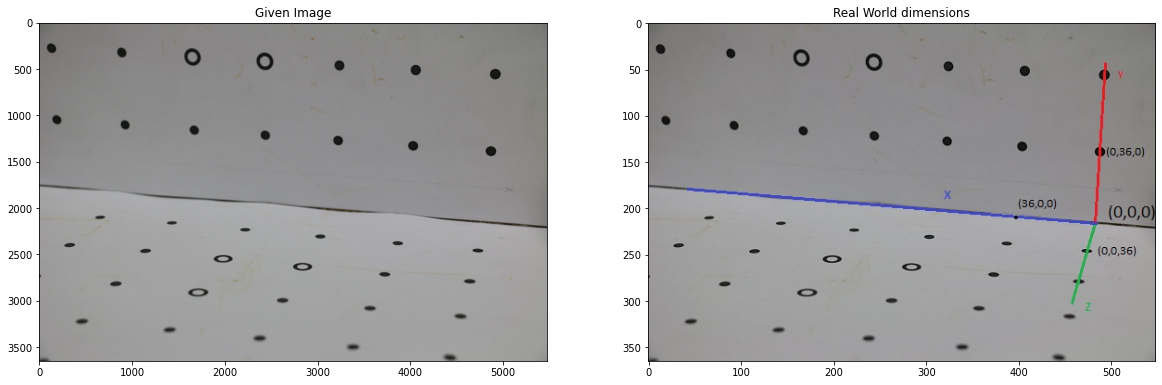

In [35]:
blackdots = cv2.imread('/content/black-dots.JPG')
measurements=cv2.imread('/content/measurements.jpg')


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(40)
plt.subplot(121)
plt.imshow(cv2.cvtColor(blackdots, cv2.COLOR_BGR2RGB))
plt.title('Given Image')

plt.subplot(122)
plt.imshow(cv2.cvtColor(measurements, cv2.COLOR_BGR2RGB))
plt.title('Real World dimensions')

In [36]:
world_points = np.array([[0,36,0],[0,36*2,0],[0,0,36],[0,0,36*2],[0,0,36*3],[0,0,36*4],
                        [36,36,0],[36*2,36,0],[36*3,36,0],[36*4,36,0],[36*5,36,0],[36*6,36,0],
                        [36,36*2,0],[36*2,36*2,0],[36*3,36*2,0],[36*4,36*2,0],[36*5,36*2,0],[36*6,36*2,0],
                        [36,0,36],[36*2,0,36],[36*3,0,36],[36*4,0,36],[36*5,0,36],
                        [36,0,36*2],[36*2,0,36*2],[36*3,0,36*2],[36*4,0,36*2],[36*5,0,36*2],
                        [36,0,36*3],[36*2,0,36*3],[36*3,0,36*3],[36*4,0,36*3],
                        [36,0,36*4],[36*2,0,36*4],[36*3,0,36*4],[36*4,0,36*4]])

print('World Points= \n',world_points)

World Points= 
 [[  0  36   0]
 [  0  72   0]
 [  0   0  36]
 [  0   0  72]
 [  0   0 108]
 [  0   0 144]
 [ 36  36   0]
 [ 72  36   0]
 [108  36   0]
 [144  36   0]
 [180  36   0]
 [216  36   0]
 [ 36  72   0]
 [ 72  72   0]
 [108  72   0]
 [144  72   0]
 [180  72   0]
 [216  72   0]
 [ 36   0  36]
 [ 72   0  36]
 [108   0  36]
 [144   0  36]
 [180   0  36]
 [ 36   0  72]
 [ 72   0  72]
 [108   0  72]
 [144   0  72]
 [180   0  72]
 [ 36   0 108]
 [ 72   0 108]
 [108   0 108]
 [144   0 108]
 [ 36   0 144]
 [ 72   0 144]
 [108   0 144]
 [144   0 144]]


In [37]:
image_points = np.array([[4869,1389],[4912,557],[4725,2460],[4653,2780],[4541,3160],[4421,3601],
                        [4037,1329],[3225,1281],[2441,1221],[1673,1165],[929,1109],[193,1057],
                        [4057,525],[3237,461],[2433,425],[1653,373],[893,333],[129,285],
                        [3865,2381],[3033,2309],[2225,2233],[1433,2157],[657,2101],
                        [3725,2713],[2831,2637],[1987,2543],[1151,2457],[335,2397],
                        [3553,3077],[2625,2993],[1717,2905],[837,2813],
                        [3385,3497],[2377,3401],[1417,3309],[469,3213]])

print('Image Points= \n',image_points)

Image Points= 
 [[4869 1389]
 [4912  557]
 [4725 2460]
 [4653 2780]
 [4541 3160]
 [4421 3601]
 [4037 1329]
 [3225 1281]
 [2441 1221]
 [1673 1165]
 [ 929 1109]
 [ 193 1057]
 [4057  525]
 [3237  461]
 [2433  425]
 [1653  373]
 [ 893  333]
 [ 129  285]
 [3865 2381]
 [3033 2309]
 [2225 2233]
 [1433 2157]
 [ 657 2101]
 [3725 2713]
 [2831 2637]
 [1987 2543]
 [1151 2457]
 [ 335 2397]
 [3553 3077]
 [2625 2993]
 [1717 2905]
 [ 837 2813]
 [3385 3497]
 [2377 3401]
 [1417 3309]
 [ 469 3213]]


##DLT

**Initially , we have to write a matrix using world and image coordinates. After writing a matrix, we have to perform SVD on the matrix to obtain the Projection Matrix(P). The matrix P is then decomposed into K,T and R.**

In [38]:
def DLT(X, x):
    proj = []
    P=[]
    K=[]
    R=[]
    X0=[]
    for i in range(X.shape[0]):
        matrix1 = [-X[i][0],-X[i][1],-X[i][2],-1,0,0,0,0,X[i][0]*x[i][0],X[i][1]*x[i][0],X[i][2]*x[i][0],x[i][0]]
        matrix2 = [0,0,0,0,-X[i][0],-X[i][1],-X[i][2],-1,X[i][0]*x[i][1] ,X[i][1]*x[i][1] ,X[i][2]*x[i][1] ,x[i][1] ]
        proj.append(matrix1)
        proj.append(matrix2)  
    _, _,V = np.linalg.svd(proj)
    
    P = V[11].reshape((3, 4))

    #Decomposing P into K,T,R
    KR = P[:, 0:3]
    minus_KRC = P[:, 3]
    KR_inv=np.linalg.inv(KR)
    X0 = np.dot(-KR_inv, minus_KRC)
    R_T, K_cap_inv = np.linalg.qr(KR_inv)
    R = R_T.T
    K = np.linalg.inv(K_cap_inv)
    K = K / K[2,2]
    return P, K, R,X0


In [39]:
P,k,r,x0 = DLT(world_points,image_points)
print("Projection Matrix:",P)
print("Camera Matrix:",k)
print("Rotation Matrix:",r)
print("Camera Center:",x0)

Projection Matrix: [[-3.99558983e-03 -3.11844544e-04 -1.83562311e-03  9.12108146e-01]
 [-2.11099524e-04 -4.26959083e-03  8.28875483e-04  4.09902794e-01]
 [ 6.54647889e-08 -1.24260308e-07 -3.01166371e-07  1.89932203e-04]]
Camera Matrix: [[-1.29238140e+04  1.01803449e+02  2.98845457e+03]
 [-0.00000000e+00 -1.28784855e+04  2.41870726e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Rotation Matrix: [[-0.97659527  0.00654924 -0.21498554]
 [-0.08632573 -0.92743255  0.36389109]
 [-0.19700138  0.3739331   0.90629162]]
Camera Center: [-35.34546473 202.47512692 539.43173628]


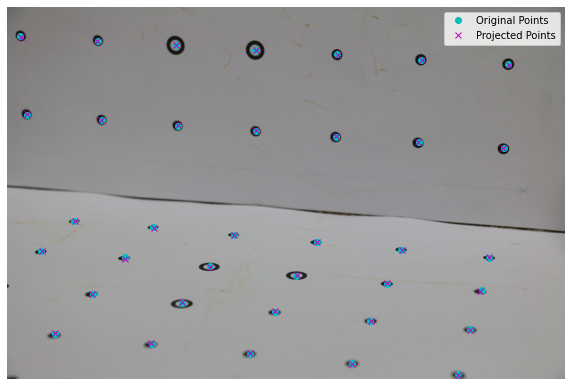

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cv2.imread("/content/black-dots.JPG"),cv2.COLOR_BGR2RGB))
for i in range(world_points.shape[0]):
    proj_new = P @ np.append(world_points[i],1).T
    proj = proj_new/proj_new[2]
    orig = image_points[i]
    plt.plot(orig[0],orig[1],'co')
    plt.plot(proj[0],proj[1], 'mx')
plt.axis('off')
plt.legend(['Original Points','Projected Points'])
plt.show()    

##RANSAC

**The algorithm of RANSAC is explained in the code itself.**

In [41]:
world_points = np.array([[0,36,0],[0,36*2,0],[0,0,36],[0,0,36*2],[0,0,36*3],[0,0,36*4],
                        [36,36,0],[36*2,36,0],[36*3,36,0],[36*4,36,0],[36*5,36,0],[36*6,36,0],
                        [36,36*2,0],[36*2,36*2,0],[36*3,36*2,0],[36*4,36*2,0],[36*5,36*2,0],[36*6,36*2,0],
                        [36,0,36],[36*2,0,36],[36*3,0,36],[36*4,0,36],[36*5,0,36],
                        [36,0,36*2],[36*2,0,36*2],[36*3,0,36*2],[36*4,0,36*2],[36*5,0,36*2],
                        [36,0,36*3],[36*2,0,36*3],[36*3,0,36*3],[36*4,0,36*3],
                        [36,0,36*4],[36*2,0,36*4],[36*3,0,36*4],[36*4,0,36*4]])

image_points = np.array([[4869,1389],[4912,557],[4725,2460],[4653,2780],[4541,3160],[4421,3601],
                        [4037,1329],[3225,1281],[2441,1221],[1673,1165],[929,1109],[193,1057],
                        [4057,525],[3237,461],[2433,425],[1653,373],[893,333],[129,285],
                        [3865,2381],[3033,2309],[2225,2233],[1433,2157],[657,2101],
                        [3725,2713],[2831,2637],[1987,2543],[1151,2457],[335,2397],
                        [3553,3077],[2625,2993],[1717,2905],[837,2813],
                        [3385,3497],[2377,3401],[1417,3309],[469,3213]])


In [42]:
def calculate_error(X,P,x):
    param_x=[]
    param_x = P @ X.T
    param_x = param_x/param_x[2]
    diff_x=x-param_x
    error=np.linalg.norm(diff_x)
    return error

In [43]:
def RANSAC(X,x,threshold,iterations,feature_points):

    total_points = X.shape[0]
    world=[]
    P_final = np.zeros((3,4))
    image=[]
    most_inline=0
    for i in range(iterations):
      #selecting feature points at random 
        features = np.random.choice(total_points,feature_points)
        world = X[features]
        image = x[features]
        #computing Homography
        P,_,_,_ = DLT(world,image)
        
        inliers = 0
        tot_error = 0
        #Computing inliers
        for j in range(total_points):
            point_world = np.append(X[j],1)
            point_image = np.append(x[j],1)
            error = calculate_error(point_world,P,point_image)
            tot_error+=error
            if(error<threshold):
                inliers+=1

        #Keeping largest set of inliers    
        if inliers>most_inline:
            most_inline = inliers
            P_final = P
            final_error = tot_error/total_points

        #Finding K,R,X0
        KR = P[:, 0:3]
        minus_KRC = P[:, 3]
        KR_inv=np.linalg.inv(KR)
        X0 = np.dot(-KR_inv, minus_KRC)
        R_T, K_cap_inv = np.linalg.qr(KR_inv)
        R = np.transpose(R_T)
        K = np.linalg.inv(K_cap_inv)
        K = K / K[2,2]
    return P_final,final_error,most_inline,K,R,X0  

In [44]:
P,error,inliner,k,r,x0 = RANSAC(world_points,image_points,10,100,10)
print("Projection matrix from the best set:",P)
print("Average projection error:",error)
print("Number of inlier points:",inliner)
print("Camera Matrix :",k)
print("Rotation Matrix: ",r)
print("Camera Center: ",x0)

Projection matrix from the best set: [[-3.99290256e-03 -3.37614855e-04 -1.83903303e-03  9.12105936e-01]
 [-2.15003019e-04 -4.26165620e-03  8.31279617e-04  4.09907778e-01]
 [ 6.15638236e-08 -1.28328428e-07 -3.02372840e-07  1.90162559e-04]]
Average projection error: 10.093372368776294
Number of inlier points: 22
Camera Matrix : [[-1.49915298e+04 -2.91917108e+02  3.30471616e+03]
 [-0.00000000e+00 -1.41987374e+04 -1.25022881e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Rotation Matrix:  [[-0.9771732   0.00409791 -0.21240469]
 [-0.03390975 -0.99000395  0.13690258]
 [-0.20972047  0.14098012  0.96754428]]
Camera Center:  [-68.72257734 246.43046043 624.87927567]


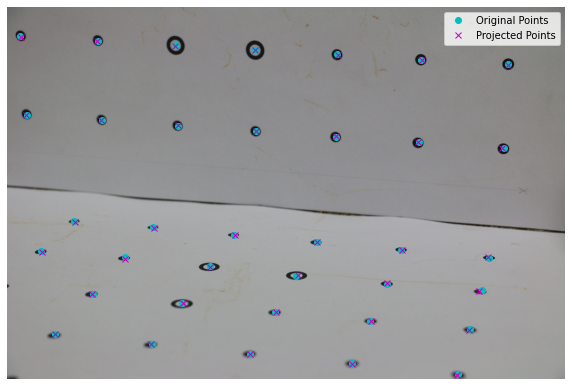

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cv2.imread("/content/black-dots.JPG"),cv2.COLOR_BGR2RGB))
for i in range(world_points.shape[0]):
    proj = P @ np.append(world_points[i],1).T
    proj = proj/proj[2]
    cc = image_points[i]
    plt.plot(cc[0],cc[1],'co')
    plt.plot(proj[0],proj[1], 'mx')
plt.axis('off')
plt.legend(['Original Points','Projected Points'])
plt.show()  

#QUESTION 4

**In this, we have to undistort the image given and also estimate the distorrion parameters. This can be done using DLT and some of the in-built cv2 functions which can be seen in the code below.**

In [46]:
world_points = np.array([[0,36,0],[0,36*2,0],[0,0,36],[0,0,36*2],[0,0,36*3],[0,0,36*4],
                        [36,36,0],[36*2,36,0],[36*3,36,0],[36*4,36,0],[36*5,36,0],[36*6,36,0],
                        [36,36*2,0],[36*2,36*2,0],[36*3,36*2,0],[36*4,36*2,0],[36*5,36*2,0],[36*6,36*2,0],
                        [36,0,36],[36*2,0,36],[36*3,0,36],[36*4,0,36],[36*5,0,36],
                        [36,0,36*2],[36*2,0,36*2],[36*3,0,36*2],[36*4,0,36*2],[36*5,0,36*2],
                        [36,0,36*3],[36*2,0,36*3],[36*3,0,36*3],[36*4,0,36*3],
                        [36,0,36*4],[36*2,0,36*4],[36*3,0,36*4],[36*4,0,36*4]])

image_points = np.array([[4869,1389],[4912,557],[4725,2460],[4653,2780],[4541,3160],[4421,3601],
                        [4037,1329],[3225,1281],[2441,1221],[1673,1165],[929,1109],[193,1057],
                        [4057,525],[3237,461],[2433,425],[1653,373],[893,333],[129,285],
                        [3865,2381],[3033,2309],[2225,2233],[1433,2157],[657,2101],
                        [3725,2713],[2831,2637],[1987,2543],[1151,2457],[335,2397],
                        [3553,3077],[2625,2993],[1717,2905],[837,2813],
                        [3385,3497],[2377,3401],[1417,3309],[469,3213]])

Radial Distortion Coefficients : 
 [[ 1.60905000e-01 -1.31334784e+00  4.67113391e-03  5.30230811e-02
   7.98523742e+00]] 



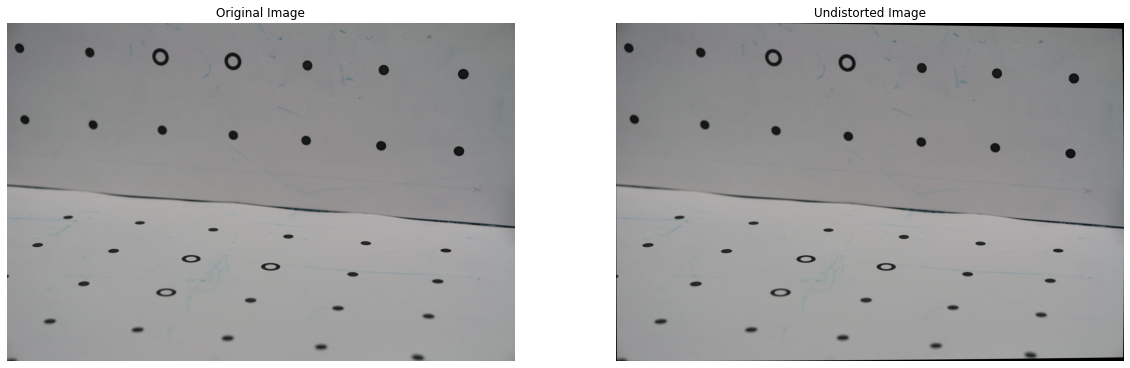

In [47]:
black_dots = cv2.imread("/content/black-dots.JPG")

P, K, R,X0 = DLT(world_points, image_points)

K[0,1] = 0
K[0][0]=-K[0][0]
K[1][1]=-K[1][1]
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(np.array([world_points]).astype(np.float32), 
                                                   np.array([image_points]).astype(np.float32),
                                                   (black_dots.shape[1],black_dots.shape[0]),
                                                   K,None, None,flags=(cv2.CALIB_USE_INTRINSIC_GUESS ))
h,w = black_dots.shape[:2]
K_new,roi = cv2.getOptimalNewCameraMatrix(K,dist,(w,h),1,(w,h))

print("Radial Distortion Coefficients : \n", dist, "\n")
undistorted = cv2.undistort(black_dots,mtx,dist,None,K_new)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(black_dots)
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(undistorted)
plt.title('Undistorted Image')
plt.show()

#Question 5

**We have to draw a wireframe over the dots. To do this, I have used RANSAC method.**

In [48]:
black_dots = cv2.imread('/content/black-dots.JPG')

world_points = np.array([[0,36,0],[0,36*2,0],[0,0,36],[0,0,36*2],[0,0,36*3],[0,0,36*4],
                        [36,36,0],[36*2,36,0],[36*3,36,0],[36*4,36,0],[36*5,36,0],[36*6,36,0],
                        [36,36*2,0],[36*2,36*2,0],[36*3,36*2,0],[36*4,36*2,0],[36*5,36*2,0],[36*6,36*2,0],
                        [36,0,36],[36*2,0,36],[36*3,0,36],[36*4,0,36],[36*5,0,36],
                        [36,0,36*2],[36*2,0,36*2],[36*3,0,36*2],[36*4,0,36*2],[36*5,0,36*2],
                        [36,0,36*3],[36*2,0,36*3],[36*3,0,36*3],[36*4,0,36*3],
                        [36,0,36*4],[36*2,0,36*4],[36*3,0,36*4],[36*4,0,36*4]])

image_points = np.array([[4869,1389],[4912,557],[4725,2460],[4653,2780],[4541,3160],[4421,3601],
                        [4037,1329],[3225,1281],[2441,1221],[1673,1165],[929,1109],[193,1057],
                        [4057,525],[3237,461],[2433,425],[1653,373],[893,333],[129,285],
                        [3865,2381],[3033,2309],[2225,2233],[1433,2157],[657,2101],
                        [3725,2713],[2831,2637],[1987,2543],[1151,2457],[335,2397],
                        [3553,3077],[2625,2993],[1717,2905],[837,2813],
                        [3385,3497],[2377,3401],[1417,3309],[469,3213]])

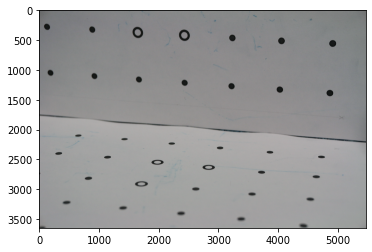

In [49]:
plt.imshow(black_dots)

In [50]:
P,error,inliner,k,r,x0 = RANSAC(world_points,image_points,10,100,10)
# print("Projection matrix from the best set:",P)
# print("Average projection error:",error)
# print("Number of inlier points:",inliner)
# print("Camera Matrix :",k_new)
# print("Rotation Matrix: ",r)
# print("Camera Center: ",x0)

Text(0.5, 1.0, 'Wireframe')

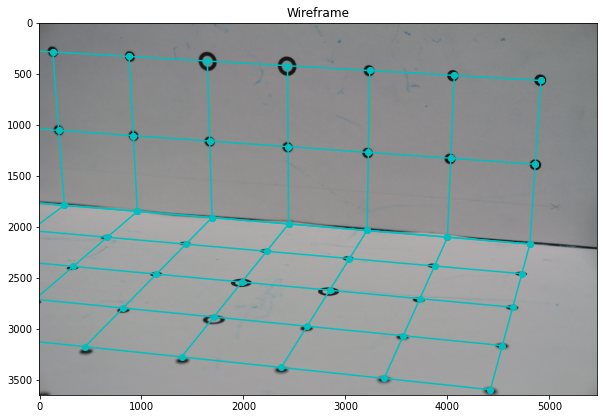

In [51]:
xy = []
for z in range(0, 36 * 3, 36):
    for x in range(0, 36 * 8, 36):
        for y in range(0, 36 * 3, 36):
            if y == 0 or z == 0:
                uvw = np.dot(P, [x, y, z, 1])
                xy.append([uvw[0] / uvw[2], uvw[1] / uvw[2]])

yz = []
for y in range(0, 36 * 5, 36):
    for x in range(0, 36 * 8, 36):
        for z in range(0, 36 * 5, 36):
            if y == 0 or z == 0:
                uvw = np.dot(P, [x, y, z, 1])
                yz.append([uvw[0] / uvw[2], uvw[1] / uvw[2]])


c = 0
plt.figure(figsize=(10,10))
index = c
for i in range(8):
    x1 = []
    y1 = []
    for j in range(5):
        x1.append(yz[index][0])
        y1.append(yz[index][1])
        index = index + 1
    plt.plot(x1, y1, 'co-', markersize = 3)
y_index = c

for i in range(5):
    x1 = []
    y1 = []
    index = y_index + i
    for j in range(8):
        x1.append(yz[index][0])
        y1.append(yz[index][1])
        index = index + 5
    plt.plot(x1, y1, 'co-')
index = c
for i in range(8):
    x1 = []
    y1 = []
    for j in range(3):
        x1.append(xy[index][0])
        y1.append(xy[index][1])
        index = index + 1
    plt.plot(x1, y1, 'co-')
y_index = c
for i in range(3):
    x1 = []
    y1 = []
    index = y_index + i
    for j in range(8):
        x1.append(xy[index][0])
        y1.append(xy[index][1])
        index = index + 3
    plt.plot(x1, y1, 'co-')
plt.imshow(black_dots)
plt.title('Wireframe')

#Question 6,7

Ref: https://learnopencv.com/camera-calibration-using-opencv/

**We have to draw a wireframe over the checkerboard images given in the dataset. To do this , we use cv2 in-built function (cv2.calibrateCamera,cv2.Rodrigues) for calculating P. Then we find the image points using P and obtain the wireframe.**

In [52]:
x,y=np.meshgrid(range(8),range(6))
worldcoor = np.hstack((x.reshape(48,1),y.reshape(48,1),np.zeros((48,1)))).astype(np.float32)

# world points
points_3d = [] 
# image points
points_2d = [] 

for i in range(15):
    im=cv2.imread("/content/checkerboard-0"+str(i+1)+".JPG")
    gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)
    corners = np.squeeze(corners)
    if ret == True:
        points_2d.append(corners)
        points_3d.append(worldcoor)


In [53]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(points_3d,points_2d, (im.shape[1],im.shape[0]), None, None)

In [54]:
rot_mat = cv2.Rodrigues(rvecs[i])[0]
P = np.zeros((3,4))
P[0:3,0:3] = rot_mat
P[0:3,3] = tvecs[i][:,0]
P = mtx @ P
P = P/P[2,3]
print(P)

[[ 4.12130259e+02 -2.53551481e+01 -8.63995932e+01  1.49020895e+03]
 [ 7.49473553e+01  3.51981008e+02  2.02218320e+02  5.63870144e+02]
 [ 1.16408378e-02 -1.27455319e-02  2.45281416e-02  1.00000000e+00]]


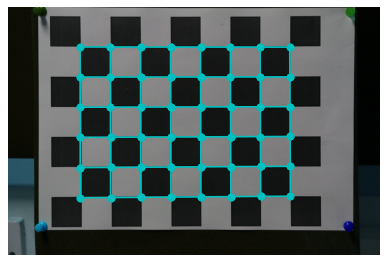

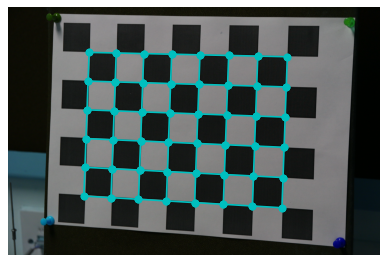

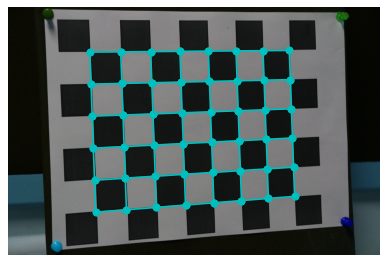

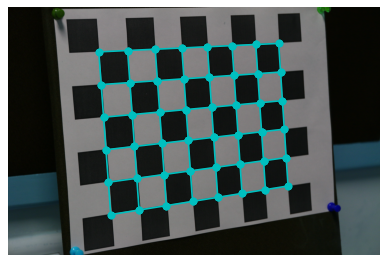

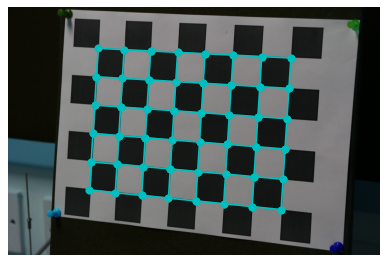

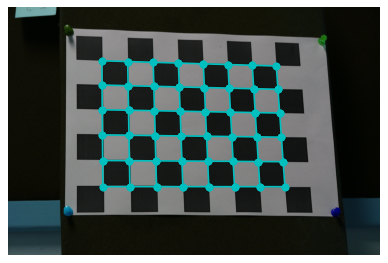

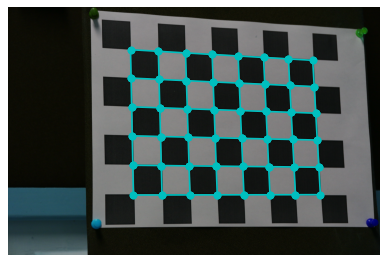

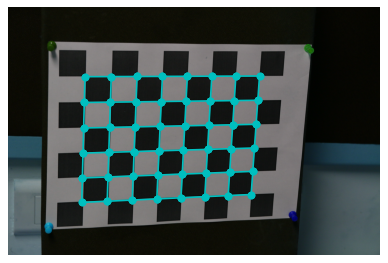

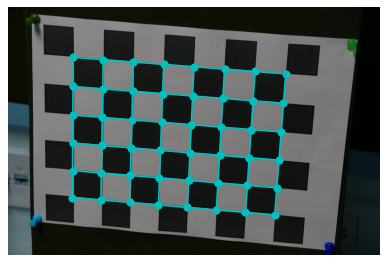

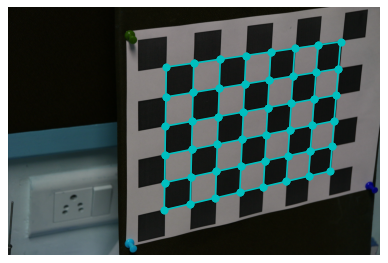

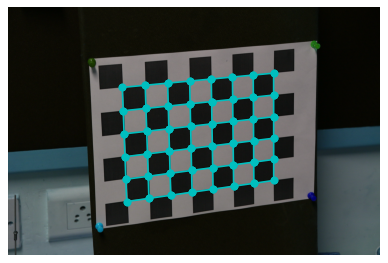

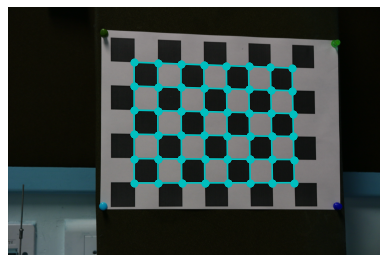

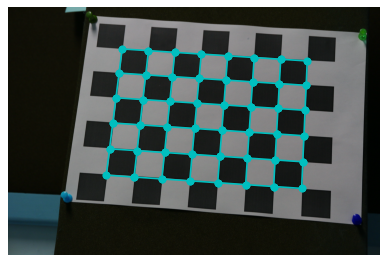

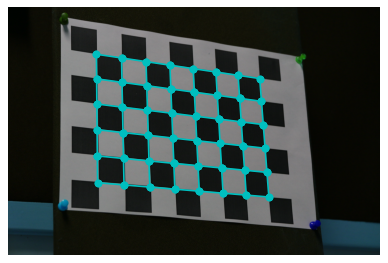

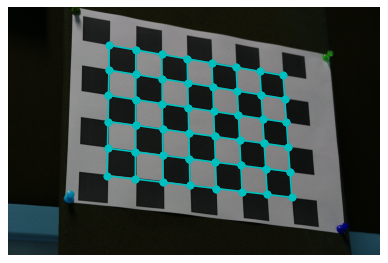

In [55]:
for i in range(15):
    im=cv2.imread("/content/checkerboard-0"+str(i+1)+".JPG")
    rot_mat = cv2.Rodrigues(rvecs[i])[0]
    P = np.zeros((3,4))
    P[0:3,0:3] = rot_mat
    P[0:3,3] = tvecs[i][:,0]
    P = mtx @ P
    P = P/P[2,3]
    worldpoint = np.hstack((worldcoor,np.ones((48,1))))
    imgpts = P@worldpoint.T
    fig = plt.figure(figsize=(6,6),dpi=80)

    for j in range(1,48):
        normalize = imgpts[:,j][2]
        normalize_ = imgpts[:,j-1][2]
        if j%8==0:
            continue
        xs = [imgpts[:,j-1][0]/normalize_,imgpts[:,j][0]/normalize]
        ys = [imgpts[:,j-1][1]/normalize_,imgpts[:,j][1]/normalize]
        plt.plot(xs,ys,'co-')
    for k in range(5):
        for j in range(8):
            normalize_ = imgpts[:,j + k*8][2]
            normalize = imgpts[:,j + (k+1)*8][2]
            xs = [imgpts[:,j + k*8][0]/normalize_,imgpts[:,j + (k+1)*8][0]/normalize]
            ys = [imgpts[:,j + k*8][1]/normalize_,imgpts[:,j + (k+1)*8][1]/normalize] 
            plt.plot(xs,ys,'co-')
    plt.axis('off')
    plt.imshow(im)
    plt.show()

#Question 8

**The image of the world origin can be found from the Projection Matrix P. The fourth column of the P matrix gives the image of the world origin. The image of the world origin for the checkerboard image is found and plotted.**

In [56]:
x,y=np.meshgrid(range(8),range(6))
worldcoor = np.hstack((x.reshape(48,1),y.reshape(48,1),np.zeros((48,1)))).astype(np.float32)

# world points
points_3d = [] 
# image points
points_2d = [] 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

for i in range(1):
    im=cv2.imread("/content/checkerboard-0"+str(i+1)+".JPG")
    gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)
    corners = np.squeeze(corners)
    if ret == True:
        points_2d.append(corners)
        points_3d.append(worldcoor)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(points_3d,points_2d, (im.shape[1],im.shape[0]), None, None)

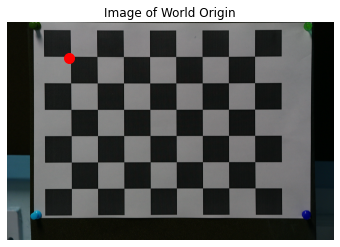

In [57]:
world_origin = np.array([0,0,0,1])
P = projection(mtx,rvecs[i],tvecs[i])
x = P @ world_origin
im=cv2.imread("/content/checkerboard-01.JPG")
plt.plot(x[0],x[1],'-ro',markersize=10)
plt.axis('off')
plt.title("Image of World Origin")
plt.imshow(im)

#Question 9,10

###DLT

Text(0.5, 1.0, 'Real World dimensions')

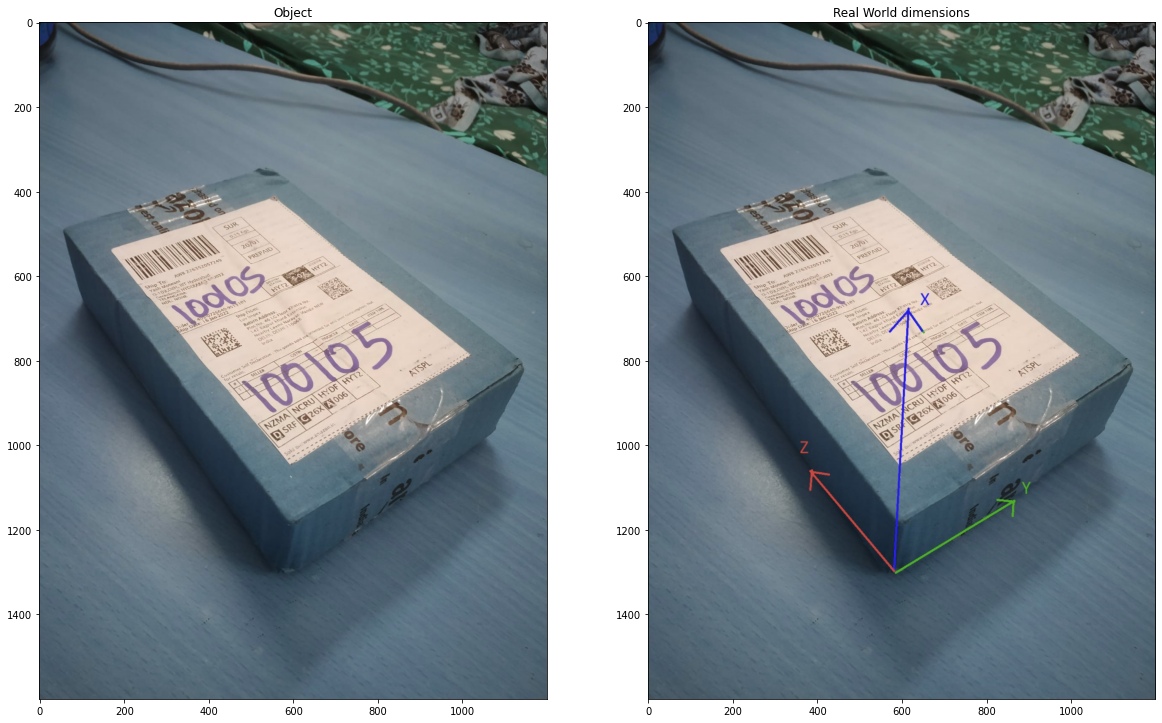

In [58]:
im=cv2.cvtColor(cv2.imread("/content/q_10.jpeg"),cv2.COLOR_BGR2RGB)
ref = cv2.cvtColor(cv2.imread("/content/q_10_reference.jpeg"),cv2.COLOR_BGR2RGB)


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(40)
plt.subplot(121)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Object')

plt.subplot(122)
plt.imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
plt.title('Real World dimensions')

In [59]:
'''
B in X
L in Y
H in Z
'''
B=4.3
L=12.8
H=18.8

world_points = np.array([[0,0,0],[4.3,0,0],[0,12.8,0],[0,0,18.8],[4.3,12.8,18.8]])

print('World Points= \n',world_points)

World Points= 
 [[ 0.   0.   0. ]
 [ 4.3  0.   0. ]
 [ 0.  12.8  0. ]
 [ 0.   0.  18.8]
 [ 4.3 12.8 18.8]]


In [60]:
image_points = np.array([[594,1184],[1076,971],[103,653],[1139,818],[536,347]])

print('Image Points= \n',image_points)

Image Points= 
 [[ 594 1184]
 [1076  971]
 [ 103  653]
 [1139  818]
 [ 536  347]]


In [61]:
P,k,r,x0 = DLT(world_points,image_points)
print("Projection Matrix:",P)
print("Camera Matrix:",k)
print("Rotation Matrix:",r)
print("Camera Center:",x0)

Projection Matrix: [[ 6.94080074e-01 -2.84515510e-03 -1.95716312e-01 -8.81963267e-02]
 [ 6.48723381e-01 -4.79868595e-02 -1.34576503e-01 -1.75798739e-01]
 [ 6.60523695e-04 -8.29194550e-05 -1.68052687e-04 -1.48478665e-04]]
Camera Matrix: [[-1.02716187e+02  7.23294166e+01  1.04279515e+03]
 [ 0.00000000e+00  6.37431222e+01  9.65387286e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Rotation Matrix: [[-0.10298785  0.66986217 -0.73530821]
 [-0.25276064 -0.73259769 -0.63199104]
 [-0.962032    0.12076958  0.24476346]]
Camera Center: [ 0.54660391 -0.46555114  1.49458735]


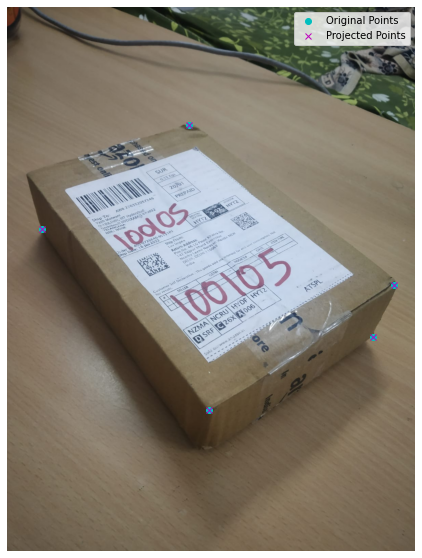

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cv2.imread("/content/q_10.jpeg"),cv2.COLOR_BGR2RGB))
for i in range(world_points.shape[0]):
    proj_new = P @ np.append(world_points[i],1).T
    proj = proj_new/proj_new[2]
    orig = image_points[i]
    plt.plot(orig[0],orig[1],'co')
    plt.plot(proj[0],proj[1], 'mx')
plt.axis('off')
plt.legend(['Original Points','Projected Points'])
plt.show()    

###RANSAC

In [63]:
'''
B in X
L in Y
H in Z
'''
B=4.3
L=12.8
H=18.8

world_points = np.array([[0,0,0],[4.3,0,0],[0,12.8,0],[0,0,18.8],[4.3,12.8,18.8]])
image_points = np.array([[594,1184],[1076,971],[103,653],[1139,818],[536,347]])


In [64]:
def RANSAC(X,x,threshold,iterations,feature_points):

    total_points = X.shape[0]
    world=[]
    P_final = np.zeros((3,4))
    image=[]
    most_inline=0
    for i in range(iterations):
      #selecting feature points at random 
        features = np.random.choice(total_points,feature_points)
        world = X[features]
        image = x[features]
        #computing Homography
        P,_,_,_ = DLT(world,image)
        
        inliers = 0
        tot_error = 0
        #Computing inliers
        for j in range(total_points):
            point_world = np.append(X[j],1)
            point_image = np.append(x[j],1)
            error = calculate_error(point_world,P,point_image)
            tot_error+=error
            if(error<threshold):
                inliers+=1

        #Keeping largest set of inliers    
        if inliers>most_inline:
            most_inline = inliers
            P_final = P
            final_error = tot_error/total_points

        #Finding K,R,X0
        KR = P[:, 0:3]
        minus_KRC = P[:, 3]
        KR_inv=np.linalg.inv(KR)
        X0 = np.dot(-KR_inv, minus_KRC)
        R_T, K_cap_inv = np.linalg.qr(KR_inv)
        R = np.transpose(R_T)
        K = np.linalg.inv(K_cap_inv)
        K = K / K[2,2]
    return P_final,final_error,most_inline,K,R,X0  

In [65]:
P,error,inliner,k,r,x0 = RANSAC(world_points,image_points,10,100,5)
print("Projection matrix from the best set:",P)
print("Average projection error:",error)
print("Number of inlier points:",inliner)
print("Camera Matrix :",k)
print("Rotation Matrix: ",r)
print("Camera Center: ",x0)

Projection matrix from the best set: [[ 1.23958095e-01 -2.22280068e-02  3.41187587e-03  4.44651497e-01]
 [-9.40030072e-04  1.00705848e-02 -2.77077458e-02  8.86308708e-01]
 [ 3.72197470e-05  6.29779594e-05 -1.60568353e-05  7.48571544e-04]]
Average projection error: 1.16627232003457e-10
Number of inlier points: 5
Camera Matrix : [[-1.15560802 -1.29752891 -1.68956968]
 [-0.         -0.82380419  0.6060115 ]
 [ 0.          0.          1.        ]]
Rotation Matrix:  [[-0.85547462 -0.42212704  0.29995322]
 [-0.00762713 -0.56890008 -0.82237129]
 [ 0.51778856 -0.70580555  0.48345996]]
Camera Center:  [ 4.41685409 -0.18196483 -0.39154841]


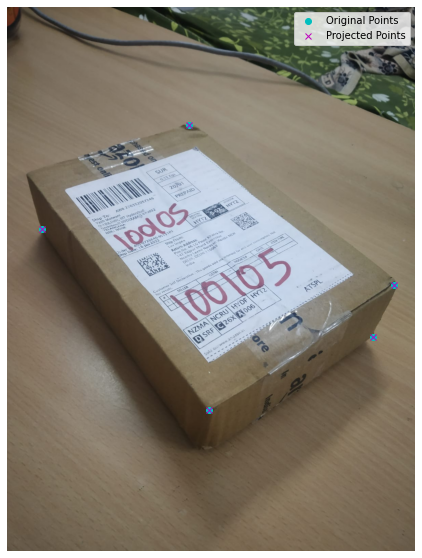

In [66]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cv2.imread("/content/q_10.jpeg"),cv2.COLOR_BGR2RGB))
for i in range(world_points.shape[0]):
    proj = P @ np.append(world_points[i],1).T
    proj = proj/proj[2]
    orig = image_points[i]
    plt.plot(orig[0],orig[1],'co')
    plt.plot(proj[0],proj[1], 'mx')
plt.axis('off')
plt.legend(['Original Points','Projected Points'])
plt.show()  

###ZHANG

In [67]:
x,y = np.meshgrid(range(4),range(4))
world_points = np.hstack((x.reshape(16, 1),y.reshape(16, 1),np.zeros((16, 1)))).astype(np.float32)

points_3d = []
points_2d = []
img = cv2.imread('/content/q10_checkerboard.jpeg')
ret, corners = cv2.findChessboardCorners(img,(4, 4))
if ret is True:
    points_2d.append(corners)
    points_3d.append(world_points)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(points_3d, points_2d, (img.shape[1],img.shape[0]), None, None)


projected = []
for i in range(len(points_3d)):
    pred2d, _ = cv2.projectPoints(points_3d[i], rvecs[i], tvecs[i], mtx, dist)
    projected.append(pred2d)
projected = np.asarray(projected)
projected = projected.reshape((-1, 2))

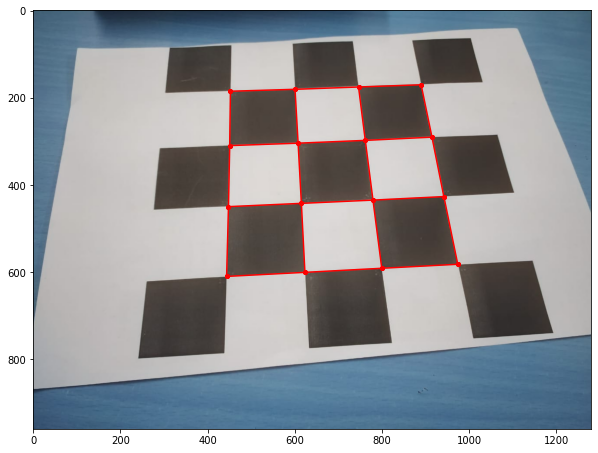

In [68]:

plt.figure(figsize=(10,10))
img = cv2.imread('/content/q10_checkerboard.jpeg')
c = 0
x_index = c
for j in range(4):
    xs = []
    ys = []
    for i in range(4):
        xs.append(projected[x_index][0])
        ys.append(projected[x_index][1])
        x_index = x_index + 1
    plt.plot(xs, ys, 'ro-', markersize = 4)
y_index = c
for j in range(4):
    xs = []
    ys = []
    index = y_index + j
    for i in range(4):
        xs.append(projected[index][0])
        ys.append(projected[index][1])
        index = index + 4
    plt.plot(xs, ys, 'ro-', markersize = 4)
plt.imshow(img)